# LGMVIP Task -1 Iris Flower Classification ML Project

_import the necessary libraries_

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

_Load the dataset_

In [6]:
data = pd.read_csv("iris.csv", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
header_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
data.to_csv("Iris.csv", header=header_list, index=False)
data1 = pd.read_csv("Iris.csv")
# for top 5 rows
data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA(Exploratory Data Analysis)

In [10]:
# Number of column and rows in dataset
data1.shape

(150, 5)

In [11]:
# Columns heading
data1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# Datatype and missing or null values in dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#Summary of dataset
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

In [15]:
data1.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
data1.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [17]:
data1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


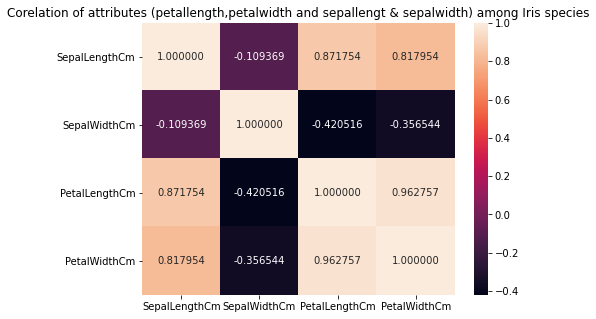

In [18]:
plt.subplots(figsize = (7,5))
sns.heatmap(data1.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petallength,petalwidth and sepallengt & sepalwidth) among Iris species")
plt.show()

As per the heatmap, it is observed that the Petal lenght and width are highly correlated.

# Data Visualization

_1.Pair Plot_

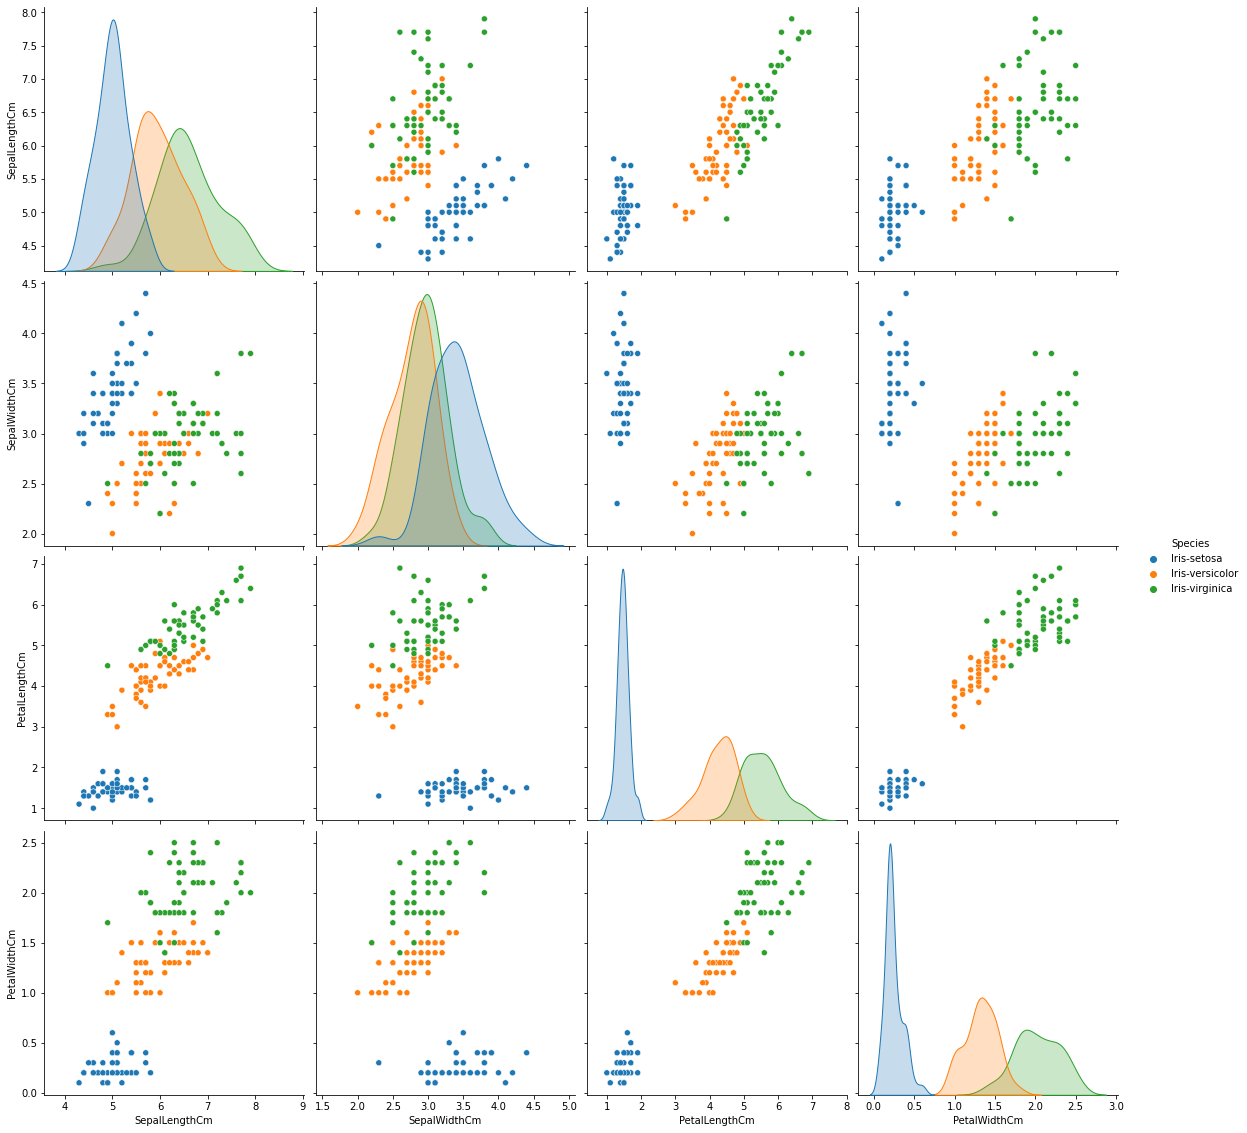

In [19]:
sns.pairplot(data1, hue = 'Species', palette=None, size = 4)
plt.show()

_In the Pair plots between different attributes, the Setosa is seperate whereas the Versiclor and Vriginica plots are together._

# _2.Scatter plot of sepal length and sepal width_

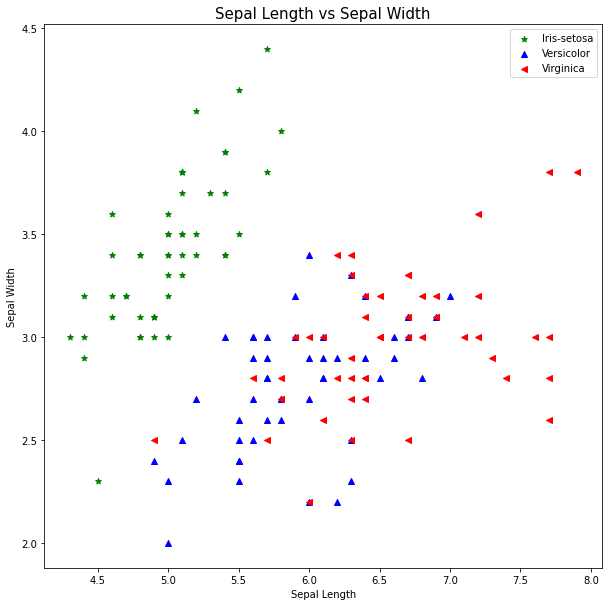

In [23]:
setosa = data1[data1['Species'] == "Iris-setosa"]
versicolor = data1[data1['Species'] == "Iris-versicolor"]
virginica = data1[data1['Species'] == "Iris-virginica"]


plt.figure(figsize=(10, 10))
plt.scatter(setosa['SepalLengthCm'],setosa['SepalWidthCm'], c="green", label="Iris-setosa", marker = '*')
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="blue", label="Versicolor", marker = '^')
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="red", label="Virginica", marker = '<')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width", fontsize=15)
plt.legend()
plt.show()

# _2.1 Scatter Plot of petal length and petal width_

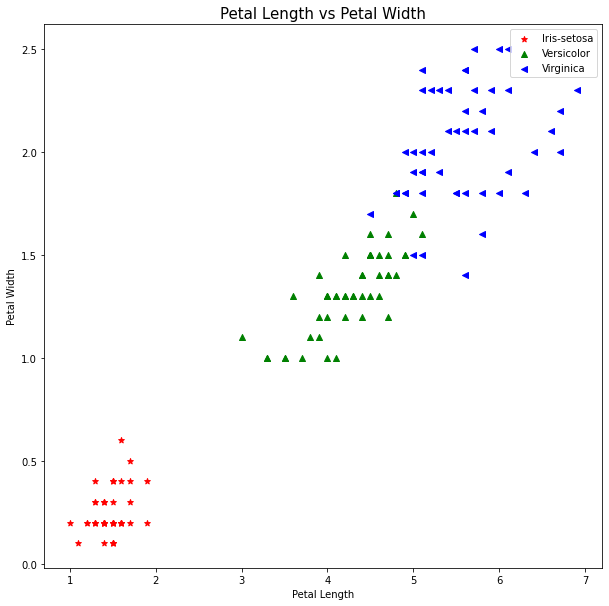

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(setosa['PetalLengthCm'],setosa['PetalWidthCm'], c="red", label="Iris-setosa", marker = '*')
plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'], c="green", label="Versicolor", marker = '^')
plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'], c="blue", label="Virginica", marker = '<')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width", fontsize=15)
plt.legend()
plt.show()

# 3. Data comparison using barplot/subplot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

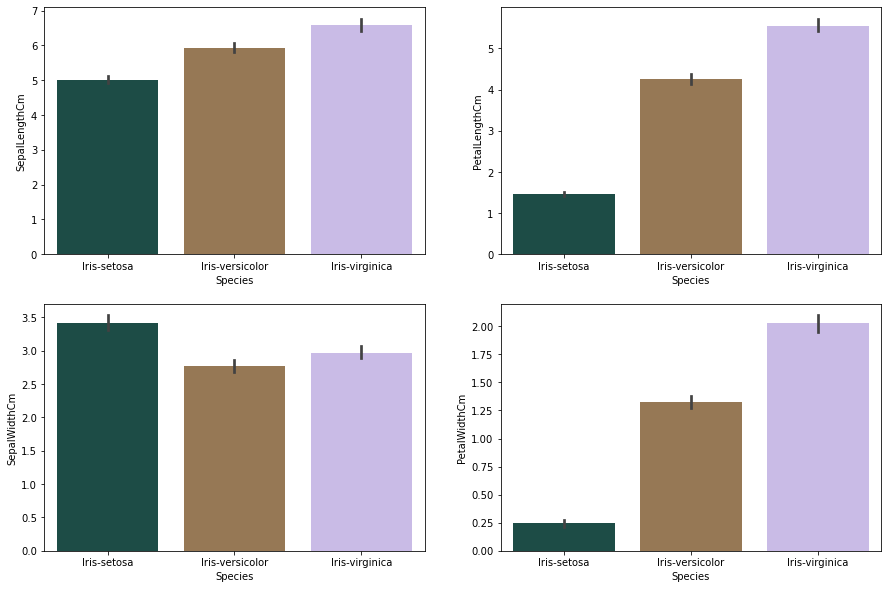

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = data1, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = data1, palette="cubehelix")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = data1, palette="cubehelix")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = data1, palette="cubehelix")

# Test and Train Data

In [26]:
x = data1.drop(columns="Species")
y = data1["Species"]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 1)

In [28]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [29]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [30]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [31]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Buildings Models

# _1. Logistic Regression_

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
predict = model.predict(x_test)
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [35]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train) 

In [36]:
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9777777777777777
Test Accuracy:  0.9666666666666667


# _2. KNeighboursClassifiers_

In [37]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [38]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy of Model:\n",knn.score(x_train,y_train)*100)

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 20]]
Accuracy of Model:
 96.66666666666667


# _3. Random Forest Classifier_

In [39]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]
Training Score:
 100.0


0.9666666666666667

# Conclusion:- I got the same accuracy of 0.966 using all the 3 models.

# Thank You